# Challenge 13: Reinforcement Learning - FrozenLake Navigation

## Overview

This challenge involves training an agent to navigate a frozen lake environment using reinforcement learning. The agent must learn to reach the goal while avoiding holes by using Q-learning, a value-based reinforcement learning algorithm.

## Import Libraries

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

## 1. Create the Environment

We create the FrozenLake environment from OpenAI Gym. This environment represents a 4x4 grid where the agent must navigate from the starting position (S) to the goal (G) without falling into holes (H). The ice is slippery, making movement stochastic.

In [2]:
env = gym.make("FrozenLake-v1", render_mode="ansi")
print("Environment created successfully")
print(f"State space size: {env.observation_space.n}")
print(f"Action space size: {env.action_space.n}")
print("\nActions: 0=Left, 1=Down, 2=Right, 3=Up")

Environment created successfully
State space size: 16
Action space size: 4

Actions: 0=Left, 1=Down, 2=Right, 3=Up


## 2. Initialize Q-table

The Q-table stores the expected future rewards for each state-action pair. We initialize it with zeros. The table has one row for each state and one column for each action.

In [3]:
state_space_size = env.observation_space.n
action_space_size = env.action_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(f"Q-table shape: {q_table.shape}")

Q-table shape: (16, 4)


## 3. Set Hyperparameters

We define the key parameters for Q-learning. The learning rate controls how much new information overrides old information. The discount factor determines the importance of future rewards. Epsilon controls the exploration-exploitation tradeoff.

In [4]:
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

num_episodes = 10000
max_steps_per_episode = 100

## 4. Train the Agent

We train the agent using Q-learning with epsilon-greedy exploration. The agent explores randomly with probability epsilon, and exploits the best known action with probability 1-epsilon. After each action, we update the Q-table using the Bellman equation.

In [5]:
rewards_per_episode = []

for episode in range(num_episodes):
    state = env.reset()[0]
    episode_reward = 0
    
    for step in range(max_steps_per_episode):
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        
        next_state, reward, done, truncated, info = env.step(action)
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state, :])
        new_value = old_value + learning_rate * (reward + discount_factor * next_max - old_value)
        q_table[state, action] = new_value
        
        episode_reward += reward
        state = next_state
        
        if done or truncated:
            break
    
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards_per_episode.append(episode_reward)
    
    if (episode + 1) % 1000 == 0:
        avg_reward = np.mean(rewards_per_episode[-1000:])
        print(f"Episode {episode + 1}/{num_episodes} - Average reward: {avg_reward:.3f} - Epsilon: {epsilon:.3f}")

print("\nTraining completed!")

Episode 1000/10000 - Average reward: 0.201 - Epsilon: 0.010
Episode 2000/10000 - Average reward: 0.417 - Epsilon: 0.010
Episode 3000/10000 - Average reward: 0.609 - Epsilon: 0.010
Episode 4000/10000 - Average reward: 0.636 - Epsilon: 0.010
Episode 5000/10000 - Average reward: 0.696 - Epsilon: 0.010
Episode 6000/10000 - Average reward: 0.634 - Epsilon: 0.010
Episode 7000/10000 - Average reward: 0.672 - Epsilon: 0.010
Episode 8000/10000 - Average reward: 0.692 - Epsilon: 0.010
Episode 9000/10000 - Average reward: 0.691 - Epsilon: 0.010
Episode 10000/10000 - Average reward: 0.642 - Epsilon: 0.010

Training completed!


## 5. Visualize Learning Progress

We plot the average reward over episodes to see how the agent improves over time. A moving average helps smooth out the noise and shows the learning trend.

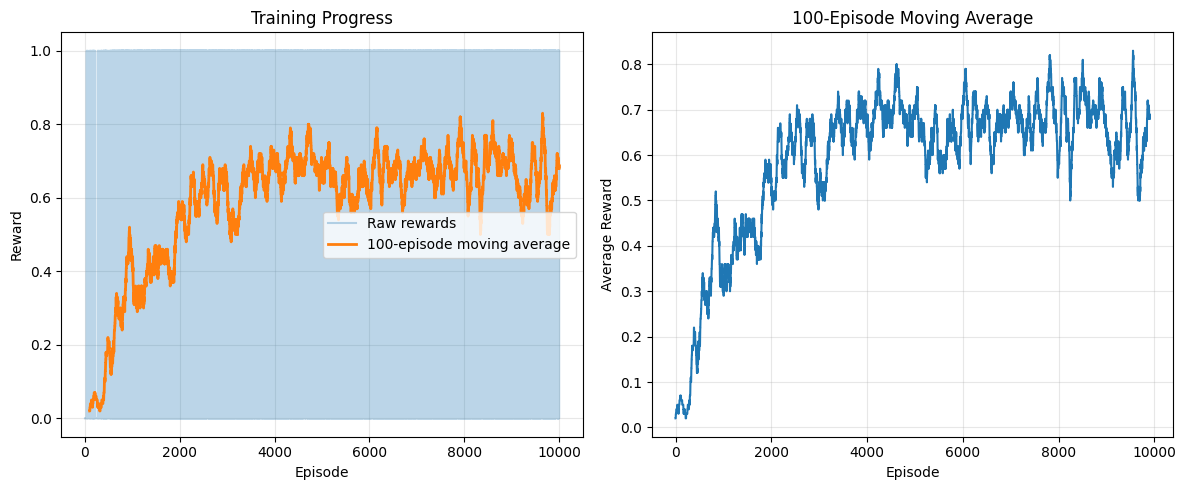

In [6]:
window_size = 100
moving_avg = np.convolve(rewards_per_episode, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode, alpha=0.3, label='Raw rewards')
plt.plot(range(window_size-1, len(rewards_per_episode)), moving_avg, label=f'{window_size}-episode moving average', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Progress')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(moving_avg)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title(f'{window_size}-Episode Moving Average')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Evaluate the Agent

We test the trained agent over multiple episodes without exploration (epsilon=0). This shows how well the agent has learned to navigate the frozen lake.

In [7]:
num_eval_episodes = 100
eval_rewards = []
successful_episodes = 0

for episode in range(num_eval_episodes):
    state = env.reset()[0]
    episode_reward = 0
    
    for step in range(max_steps_per_episode):
        action = np.argmax(q_table[state, :])
        next_state, reward, done, truncated, info = env.step(action)
        
        episode_reward += reward
        state = next_state
        
        if done or truncated:
            if reward == 1.0:
                successful_episodes += 1
            break
    
    eval_rewards.append(episode_reward)

success_rate = (successful_episodes / num_eval_episodes) * 100
average_reward = np.mean(eval_rewards)
average_steps = np.mean([i for i, r in enumerate(eval_rewards) if r > 0])

print(f"Evaluation Results over {num_eval_episodes} episodes:")
print(f"Success rate: {success_rate:.1f}%")
print(f"Average reward: {average_reward:.3f}")
print(f"Successful episodes: {successful_episodes}/{num_eval_episodes}")

Evaluation Results over 100 episodes:
Success rate: 66.0%
Average reward: 0.660
Successful episodes: 66/100


## 7. Visualize the Learned Policy

We visualize the Q-table as a heatmap to see which actions the agent prefers in each state. This helps us understand the learned policy.

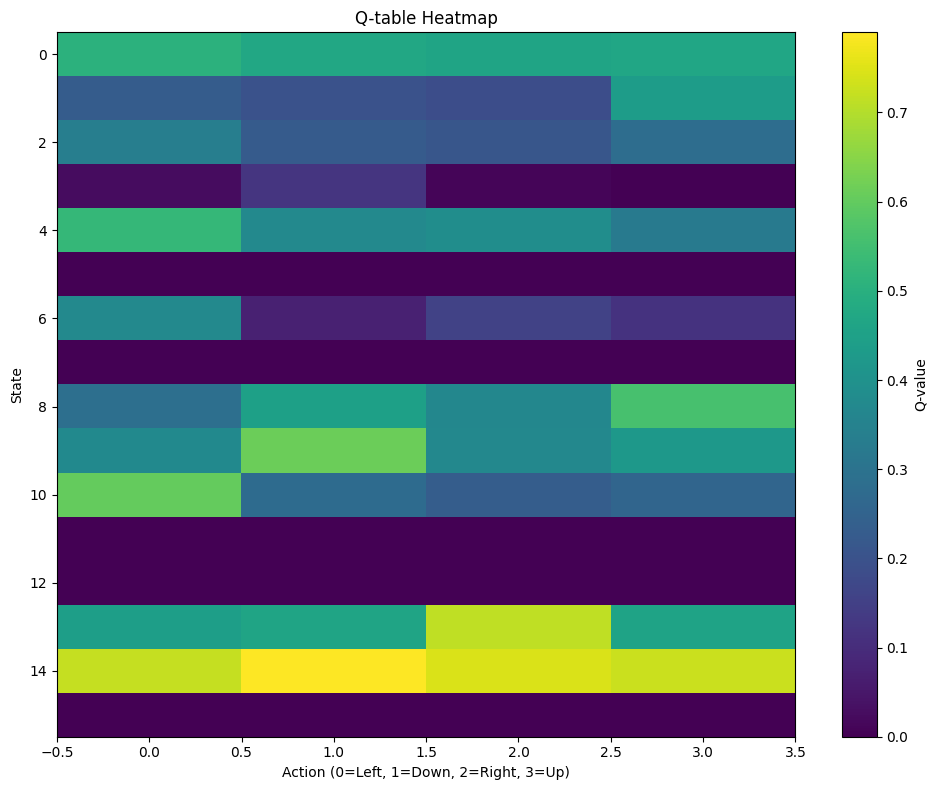


Best action for each state:
State  0: Left  (Q-value: 0.508)
State  1: Up    (Q-value: 0.437)
State  2: Left  (Q-value: 0.337)
State  3: Down  (Q-value: 0.122)
State  4: Left  (Q-value: 0.526)
State  5: Left  (Q-value: 0.000)
State  6: Left  (Q-value: 0.372)
State  7: Left  (Q-value: 0.000)
State  8: Up    (Q-value: 0.561)
State  9: Down  (Q-value: 0.613)
State 10: Left  (Q-value: 0.603)
State 11: Left  (Q-value: 0.000)
State 12: Left  (Q-value: 0.000)
State 13: Right (Q-value: 0.714)
State 14: Down  (Q-value: 0.790)
State 15: Left  (Q-value: 0.000)


In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(q_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Q-value')
plt.xlabel('Action (0=Left, 1=Down, 2=Right, 3=Up)')
plt.ylabel('State')
plt.title('Q-table Heatmap')
plt.tight_layout()
plt.show()

print("\nBest action for each state:")
action_names = ['Left', 'Down', 'Right', 'Up']
for state in range(min(16, state_space_size)):
    best_action = np.argmax(q_table[state, :])
    print(f"State {state:2d}: {action_names[best_action]:5s} (Q-value: {q_table[state, best_action]:.3f})")

## 8. Demonstrate Agent Performance

We run a single episode to show the agent's behavior after training. This demonstrates the path the agent takes from start to goal.

In [9]:
state = env.reset()[0]
print("Starting position:")
print(env.render())
print()

steps = 0
total_reward = 0

for step in range(max_steps_per_episode):
    action = np.argmax(q_table[state, :])
    action_name = ['Left', 'Down', 'Right', 'Up'][action]
    
    next_state, reward, done, truncated, info = env.step(action)
    total_reward += reward
    steps += 1
    
    print(f"Step {steps}: Action = {action_name}")
    print(env.render())
    print()
    
    state = next_state
    
    if done or truncated:
        if reward == 1.0:
            print(f"Success! Reached the goal in {steps} steps.")
        else:
            print(f"Failed! Fell into a hole after {steps} steps.")
        print(f"Total reward: {total_reward}")
        break

env.close()

Starting position:

SFFF
FHFH
FFFH
HFFG


Step 1: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 2: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 3: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 4: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 5: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 6: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 7: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 8: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 9: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 10: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 11: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 12: Action = Up
  (Up)
SFFF
FHFH
FFFH
HFFG


Step 13: Action = Down
  (Down)
SFFF
FHFH
FFFH
HFFG


Step 14: Action = Up
  (Up)
SFFF
FHFH
FFFH
HFFG


Step 15: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 16: Action = Left
  (Left)
SFFF
FHFH
FFFH
HFFG


Step 17: Action = Up
  (Up)
SFFF
FHFH
FFFH
HFFG


Step 18: Action = Down
  (Down)
SFFF
FHFH
FFFH
HFFG


Step 19

## Summary

We successfully implemented Q-learning to train an agent to navigate the FrozenLake environment. The agent learned to avoid holes and reach the goal through trial and error. The Q-table stores the learned knowledge, and the agent uses epsilon-greedy exploration to balance between exploring new actions and exploiting known good actions.